<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-255-Data_Mining/blob/main/Assignment_2/A_Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 937.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 484.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 24.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. Th

In [ ]:
#check version
import pycaret
print(pycaret.__version__)

3.3.2


In [ ]:
from pycaret.datasets import get_data
data = get_data('glass')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
from pycaret.classification import *

# Check the number of samples in the target column
print(data['Mg'].value_counts())

Mg
0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: count, Length: 94, dtype: int64


In [ ]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'Type',session_id=123)

,Description,Value
0,Session id,123
1,Target,Type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 5: 3, 6: 4, 7: 5"
4,Original data shape,"(214, 10)"
5,Transformed data shape,"(214, 10)"
6,Transformed train set shape,"(149, 10)"
7,Transformed test set shape,"(65, 10)"
8,Numeric features,9
9,Preprocess,True


In [ ]:
#import classificationExperiment and init the class
from pycaret.classification import *
exp = ClassificationExperiment()

In [ ]:
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [ ]:
#init setup on exp
exp.setup(data, target = 'Type',session_id=123)

,Description,Value
0,Session id,123
1,Target,Type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 5: 3, 6: 4, 7: 5"
4,Original data shape,"(214, 10)"
5,Transformed data shape,"(214, 10)"
6,Transformed train set shape,"(149, 10)"
7,Transformed test set shape,"(65, 10)"
8,Numeric features,9
9,Preprocess,True


In [ ]:
#compare models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7724,0.5680,0.7724,0.7326,0.7402,0.6833,0.6969,0.1730
catboost,CatBoost Classifier,0.7724,0.5722,0.7724,0.7510,0.7426,0.6816,0.6985,5.5210
rf,Random Forest Classifier,0.7590,0.5643,0.7590,0.7251,0.7278,0.6631,0.6802,0.2170
lightgbm,Light Gradient Boosting Machine,0.7252,0.5538,0.7252,0.6886,0.6919,0.6115,0.6281,0.5100
gbc,Gradient Boosting Classifier,0.7052,0.0000,0.7052,0.6724,0.6743,0.5886,0.6023,0.9690
xgboost,Extreme Gradient Boosting,0.6843,0.5384,0.6843,0.6737,0.6586,0.5607,0.5815,0.1290
dt,Decision Tree Classifier,0.6790,0.4562,0.6790,0.6544,0.6525,0.5593,0.5708,0.0360
knn,K Neighbors Classifier,0.5919,0.4895,0.5919,0.5416,0.5488,0.4180,0.4341,0.0540
lda,Linear Discriminant Analysis,0.5843,0.0000,0.5843,0.5414,0.5370,0.4072,0.4289,0.0340
lr,Logistic Regression,0.5776,0.0000,0.5776,0.5415,0.5312,0.4046,0.4337,1.2130


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
#compare models using oop
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7724,0.5680,0.7724,0.7326,0.7402,0.6833,0.6969,0.2460
catboost,CatBoost Classifier,0.7724,0.5722,0.7724,0.7510,0.7426,0.6816,0.6985,5.7570
rf,Random Forest Classifier,0.7590,0.5643,0.7590,0.7251,0.7278,0.6631,0.6802,0.2090
lightgbm,Light Gradient Boosting Machine,0.7252,0.5538,0.7252,0.6886,0.6919,0.6115,0.6281,0.3880
gbc,Gradient Boosting Classifier,0.7052,0.0000,0.7052,0.6724,0.6743,0.5886,0.6023,0.9200
xgboost,Extreme Gradient Boosting,0.6843,0.5384,0.6843,0.6737,0.6586,0.5607,0.5815,0.1590
dt,Decision Tree Classifier,0.6790,0.4562,0.6790,0.6544,0.6525,0.5593,0.5708,0.0570
knn,K Neighbors Classifier,0.5919,0.4895,0.5919,0.5416,0.5488,0.4180,0.4341,0.0770
lda,Linear Discriminant Analysis,0.5843,0.0000,0.5843,0.5414,0.5370,0.4072,0.4289,0.0380
lr,Logistic Regression,0.5776,0.0000,0.5776,0.5415,0.5312,0.4046,0.4337,0.2810


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

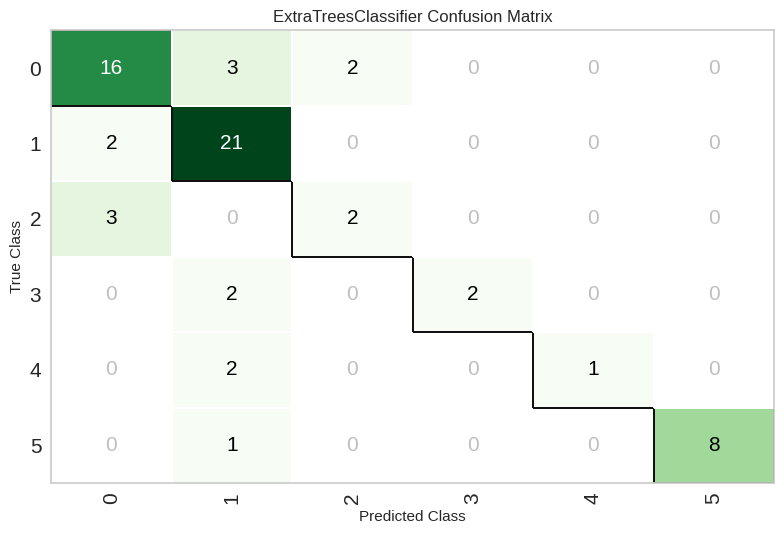

In [ ]:
#plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

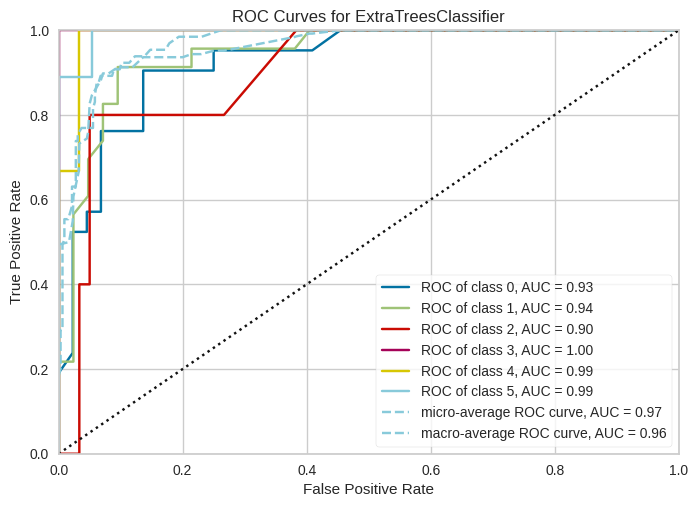

In [ ]:
# plot AUC
plot_model(best, plot = 'auc')

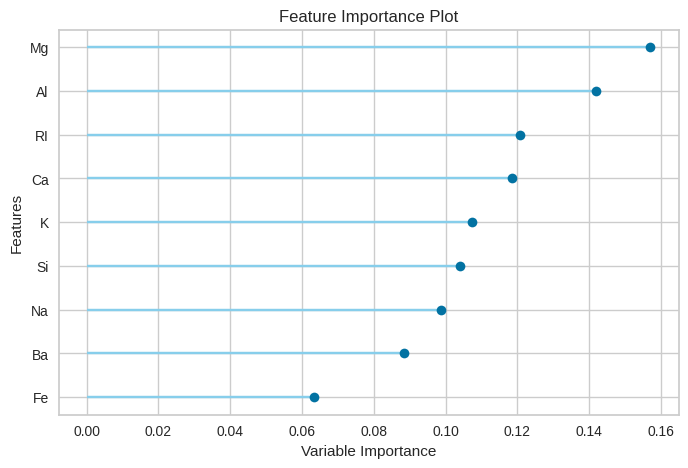

In [ ]:
#plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
#checking docstring to see available plots
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
#predicting on test set
pred = predict_model(best)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7692,0.9468,0.7692,0.7870,0.7606,0.6765,0.6824


In [ ]:
#prediction df
pred.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,prediction_label,prediction_score
175,1.52119,12.97,0.33,1.51,73.389999,0.13,11.27,0.0,0.28,5,2,0.54
108,1.52222,14.43,0.00,1.00,72.669998,0.10,11.52,0.0,0.08,2,2,0.59
84,1.51409,14.25,3.09,2.08,72.279999,1.10,7.08,0.0,0.00,2,2,0.49
3,1.51766,13.21,3.69,1.29,72.610001,0.57,8.22,0.0,0.00,1,1,0.50
182,1.51916,14.15,0.00,2.09,72.739998,0.00,10.88,0.0,0.00,6,2,0.32


In [ ]:
from types import new_class
# copy data and drop class variable
new_data = data.copy()
new_data.drop('Type', axis = 1, inplace = True)
new_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [ ]:
#predict model on new data
predictions = predict_model(best, data = new_data)
predictions.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,prediction_label,prediction_score
0,1.52101,13.64,4.49,1.10,71.779999,0.06,8.75,0.0,0.0,1,1.00
1,1.51761,13.89,3.60,1.36,72.730003,0.48,7.83,0.0,0.0,1,1.00
2,1.51618,13.53,3.55,1.54,72.989998,0.39,7.78,0.0,0.0,2,0.85
3,1.51766,13.21,3.69,1.29,72.610001,0.57,8.22,0.0,0.0,1,0.50
4,1.51742,13.27,3.62,1.24,73.080002,0.55,8.07,0.0,0.0,1,0.81


In [ ]:
#save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['RI', 'Na', 'Mg', 'Al', 'Si', 'K',
                                              'Ca', 'Ba', 'Fe'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=Fal...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_

In [ ]:
#load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['RI', 'Na', 'Mg', 'Al', 'Si', 'K',
                                             'Ca', 'Ba', 'Fe'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_f...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      monotonic_cst=None, n_estimators=100,
                                      n_jobs=-1, oob_score=False,
                                      random_state=123, verbose=0,
                                      warm_start=False))],
         verbose=False)